## Introduction
This project is a Explanatory Data Analysis of the price suggestion data from Mercari. Mercari is the biggest Japanese community-powered shopping app. The goal of this project is to predict the price of the items listed by sellers on Mercari, given its information (item condition, category, brand, text description, shipping cost). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction import stop_words

In [2]:
train = pd.read_csv(f'./train.tsv', sep='\t')
test = pd.read_csv(f'./test.tsv', sep='\t')

## Explanatory Data Analysis
### Target Variable: Price

In [3]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

Note: The range of price is from 0 to $2009

/Users/Zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


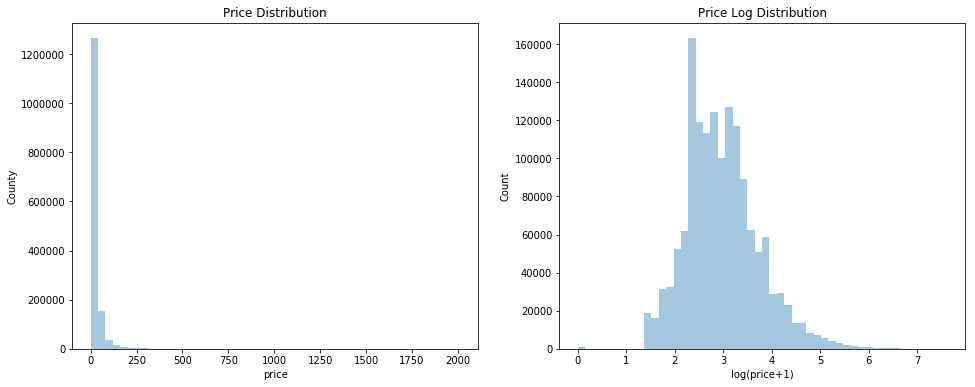

In [5]:
plt.figure(figsize=(16,6))

plt.subplot('121')
sns.distplot(train['price'], bins=50, kde=False)
plt.xlabel('price')
plt.ylabel('County')
plt.title('Price Distribution')

plt.subplot('122')
sns.distplot(np.log(train['price']+1), bins=50, kde=False)
plt.xlabel('log(price+1)')
plt.ylabel('Count')
plt.title('Price Log Distribution')

plt.show()

Note: the distribution is left skewed, so we take the log of price to get a more normal distribution.

### Shipping Cost

In [6]:
train.shipping.value_counts()/len(train)

0    0.552726
1    0.447274
Name: shipping, dtype: float64

Note: 55% of shipping costs are paid by sellers.

In [7]:
prc_shipBySeller = train.loc[train.shipping==1, 'price']
prc_shipByBuyer = train.loc[train.shipping==0, 'price']

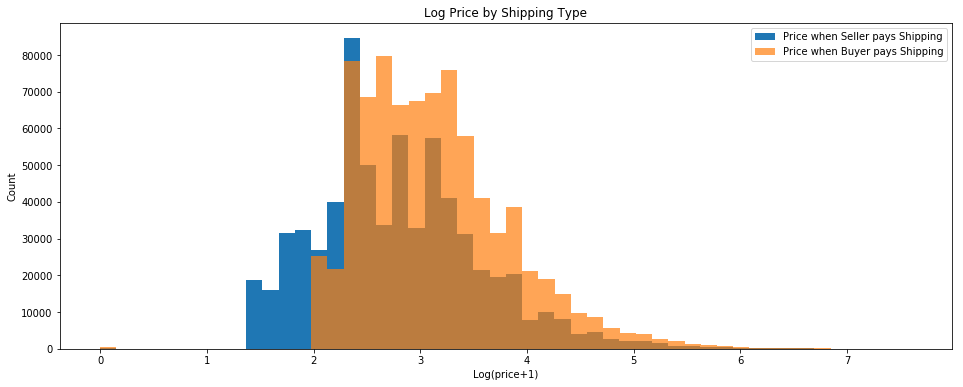

In [8]:
fig, ax = plt.subplots(figsize=(16,6))
ax.hist(np.log(prc_shipBySeller+1), alpha=1.0, bins=50,
       label='Price when Seller pays Shipping')
ax.hist(np.log(prc_shipByBuyer+1), alpha=0.7, bins=50,
       label='Price when Buyer pays Shipping')
plt.xlabel('Log(price+1)')
plt.ylabel('Count')
plt.title('Log Price by Shipping Type')
plt.legend()
plt.show()

Note: Prices are higher when shipping are not covered. Probably because buyers that buy more expensive items care less about shipping cost.

### Item Condition

In [9]:
train.item_condition_id.unique()

array([3, 1, 2, 4, 5])

There are five levels of item conditions, from 1 to 5.

In [10]:
train.groupby('item_condition_id')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
item_condition_id,,,,,,,,
1,640549.0,26.486967,35.418024,0.0,10.0,18.0,30.00,2009.0
2,375479.0,27.563225,42.125698,0.0,11.0,17.0,29.00,2004.0
3,432161.0,26.540711,40.030681,0.0,11.0,16.0,28.00,2000.0
4,31962.0,24.349212,35.679148,0.0,10.0,15.0,26.00,1309.0
5,2384.0,31.703859,39.531069,0.0,11.0,19.0,35.25,522.0


The standard deviations of prices for each item condition are significant.

In [11]:
prc_condition1 = train.loc[train.item_condition_id==1, 'price']
prc_condition2 = train.loc[train.item_condition_id==2, 'price']
prc_condition3 = train.loc[train.item_condition_id==3, 'price']
prc_condition4 = train.loc[train.item_condition_id==4, 'price']
prc_condition5 = train.loc[train.item_condition_id==5, 'price']

/Users/Zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


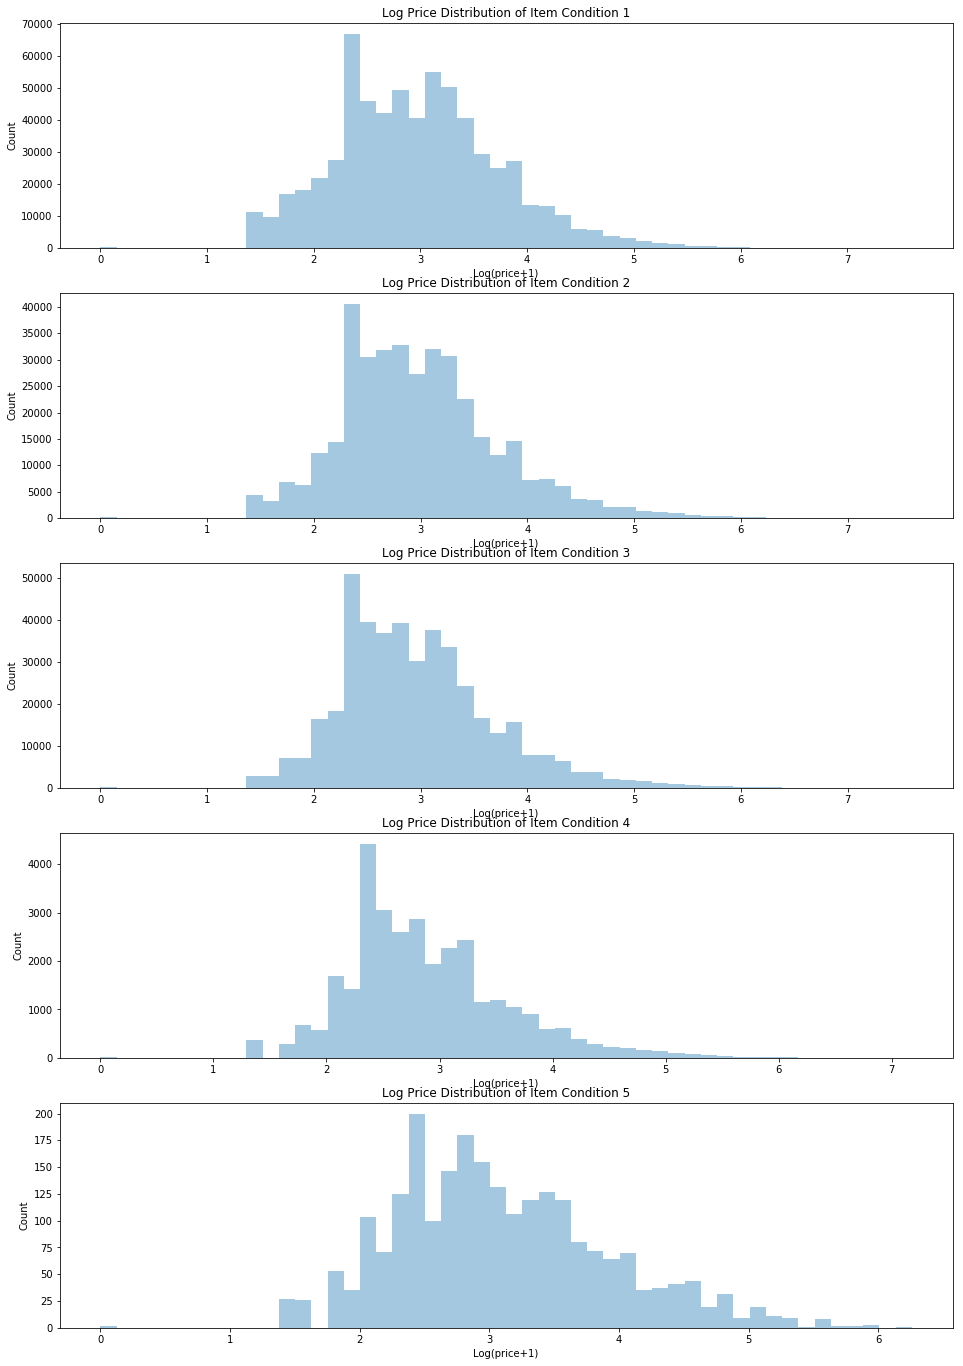

In [12]:
fig = plt.figure(figsize=(16,24))

ax1 = plt.subplot('511')
sns.distplot(np.log(prc_condition1+1), bins=50, kde=False, ax=ax1)
ax1.set_xlabel('Log(price+1)')
ax1.set_ylabel('Count')
ax1.set_title("Log Price Distribution of Item Condition 1")

ax2 = plt.subplot('512')
sns.distplot(np.log(prc_condition2+1), bins=50, kde=False, ax=ax2)
ax2.set_xlabel('Log(price+1)')
ax2.set_ylabel('Count')
ax2.set_title("Log Price Distribution of Item Condition 2")

ax3 = plt.subplot('513')
sns.distplot(np.log(prc_condition3+1), bins=50, kde=False, ax=ax3)
ax3.set_xlabel('Log(price+1)')
ax3.set_ylabel('Count')
ax3.set_title("Log Price Distribution of Item Condition 3")

ax4 = plt.subplot('514')
sns.distplot(np.log(prc_condition4+1), bins=50, kde=False, ax=ax4)
ax4.set_xlabel('Log(price+1)')
ax4.set_ylabel('Count')
ax4.set_title("Log Price Distribution of Item Condition 4")

ax5 = plt.subplot('515')
sns.distplot(np.log(prc_condition5+1), bins=50, kde=False, ax=ax5)
ax5.set_xlabel('Log(price+1)')
ax5.set_ylabel('Count')
ax5.set_title("Log Price Distribution of Item Condition 5")

plt.show()

As we can see, the item conditions 1 - 4 do not make much difference on item price, the prices of item condition 5 has a larger variance.

### Item Category

In [13]:
print("There are %d unique values in the category column." % train['category_name'].nunique())

There are 1287 unique values in the category column.


In [14]:
# TOP 5 RAW CATEGORIES
train['category_name'].value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Name: category_name, dtype: int64

It does not surprise me that the Women and Beauty categories have large numbers of listings.

In [15]:
# missing categories
print("There are %d items that do not have a label." % train['category_name'].isnull().sum())

There are 6327 items that do not have a label.


In [16]:
# A function to split category into general and subcategories and to handle missing labels
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [17]:
train['general_cat'], train['subcat_1'], train['subcat_2'] = \
    zip(*train['category_name'].apply(split_cat))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [18]:
# repeat the same step for the test set
test['general_cat'], test['subcat_1'], test['subcat_2'] = \
    zip(*test['category_name'].apply(split_cat))

In [19]:
print("There are %d unique general categories." % train['general_cat'].nunique())
print("There are %d unique primary sub-categories." % train['subcat_1'].nunique())
print("There are %d unique secondary sub-categories." % train['subcat_2'].nunique())

There are 11 unique general categories.
There are 114 unique primary sub-categories.
There are 871 unique secondary sub-categories.


In [20]:
x = train['general_cat'].value_counts().index.values.astype('str')
y = train['general_cat'].value_counts().values
# pct = [("%.2f"%(v*100))+"%"for v in (y/len(train))]

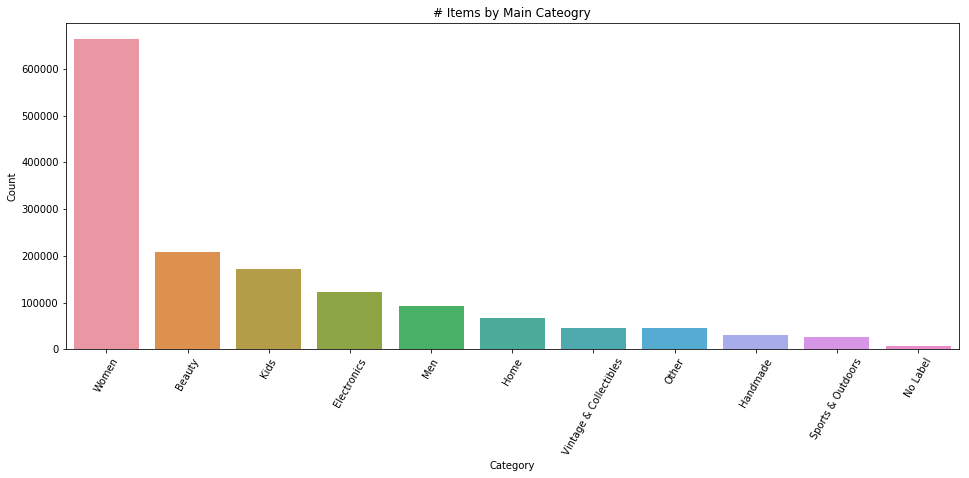

In [21]:
plt.figure(figsize=(16,6))
sns.barplot(x, y)
plt.xlabel('Category')
plt.xticks(rotation=60) 
plt.ylabel('Count')
plt.title('# Items by Main Cateogry')
plt.show()

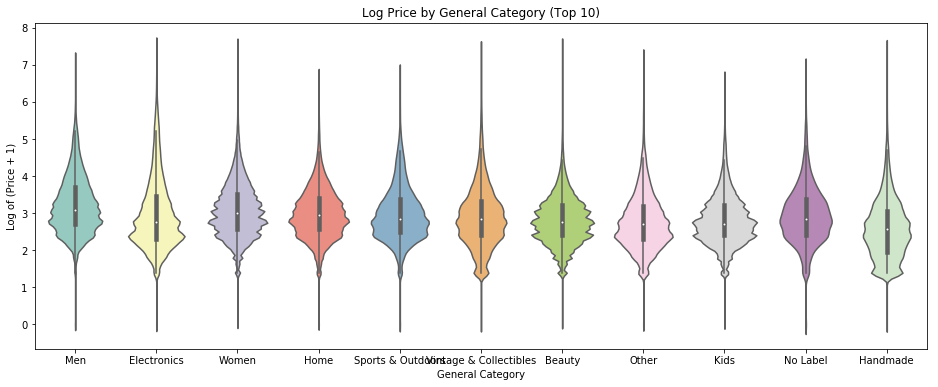

In [22]:
plt.figure(figsize=(16,6))
sns.violinplot(x=train.general_cat, y=np.log(train.price+1), palette='Set3')
plt.xlabel('General Category')
plt.ylabel('Log of (Price + 1)')
plt.title('Log Price by General Category (Top 10)')
plt.show()

In [23]:
x = train['subcat_1'].value_counts().index.values.astype('str')[:15]
y = train['subcat_1'].value_counts().values[:15]
pct = [("%.2f"%(v*100))+"%"for v in (y/len(train))][:15]

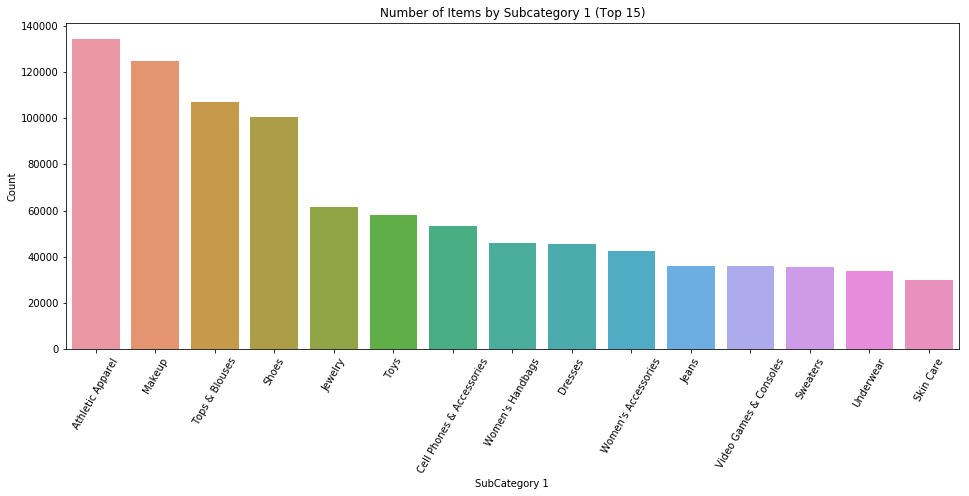

In [24]:
plt.figure(figsize=(16,6))
sns.barplot(x, y)
plt.xlabel('SubCategory 1')
plt.xticks(rotation=60) 
plt.ylabel('Count')
plt.title('Number of Items by Subcategory 1 (Top 15)')
plt.show()

In [25]:
x = train['subcat_2'].value_counts().index.values.astype('str')[:20]
y = train['subcat_2'].value_counts().values[:20]
pct = [("%.2f"%(v*100))+"%"for v in (y/len(train))][:20]

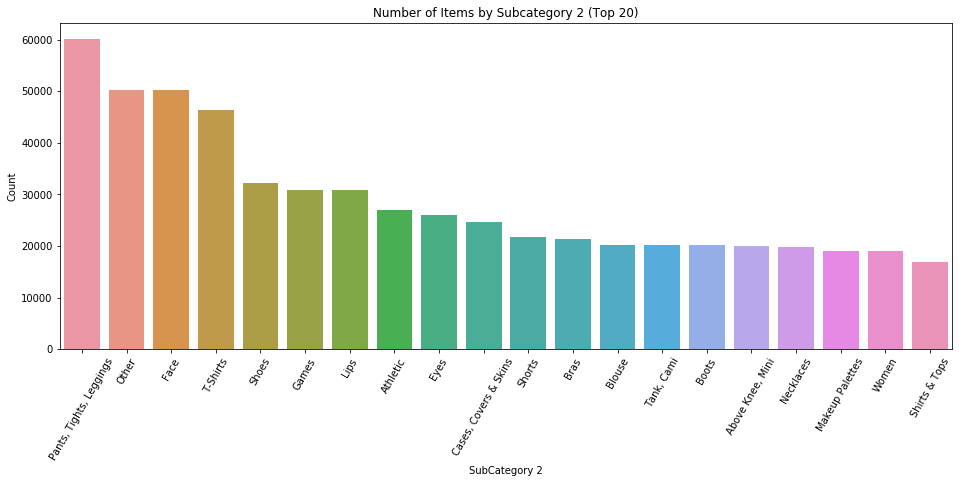

In [26]:
plt.figure(figsize=(16,6))
sns.barplot(x, y)
plt.xlabel('SubCategory 2')
plt.xticks(rotation=60) 
plt.ylabel('Count')
plt.title('Number of Items by Subcategory 2 (Top 20)')
plt.show()

### Brand Name

In [27]:
print("There are %d unique brand names in the training dataset." % train['brand_name'].nunique())

There are 4809 unique brand names in the training dataset.


Let's see which subcategory has the highest brands diversity.

In [28]:
train.groupby(by=['general_cat', 'subcat_1','subcat_2']).\
    agg({"brand_name": pd.Series.nunique}).\
    sort_values(by='brand_name', ascending=False).head(10)

brand_name
general_cat subcat_1         subcat_2                    
Women       Tops & Blouses   Blouse                   660
No Label    No Label         No Label                 605
Women       Tops & Blouses   T-Shirts                 593
            Dresses          Above Knee, Mini         593
                             Knee-Length              561
            Tops & Blouses   Tank, Cami               528
Men         Tops             T-shirts                 492
Women       Shoes            Boots                    464
                             Sandals                  435
            Athletic Apparel Shorts                   427

Let's dig into the Women/Tops & Blouses/Blouse to see how brands affect prices.

In [29]:
blouse = train[(train.general_cat == 'Women') & (train.subcat_1 == 'Tops & Blouses') & \
      (train.subcat_2 == 'Blouse')].copy()
blouse['log_price'] = np.log(blouse['price']+1) # Take log of prices
blouse.brand_name.fillna('Missing', inplace=True) # Fill null brand_names

# Keep popular brands (#items > 10)
brand_items = np.unique(blouse.brand_name, return_counts=True)
popular_brands = brand_items[0][brand_items[1] >= 10]

# Get brands with highest & lowest means
popular_items = blouse[blouse.brand_name.isin(popular_brands)]

ordered_brands = popular_items.groupby(by='brand_name')['log_price'].mean().\
    sort_values(ascending=False)
highest_brands = ordered_brands[:6].index.tolist()
lowest_brands = ordered_brands[-6:].index.tolist()

highest = blouse[blouse.brand_name.isin(highest_brands)]
lowest = blouse[blouse.brand_name.isin(lowest_brands)]

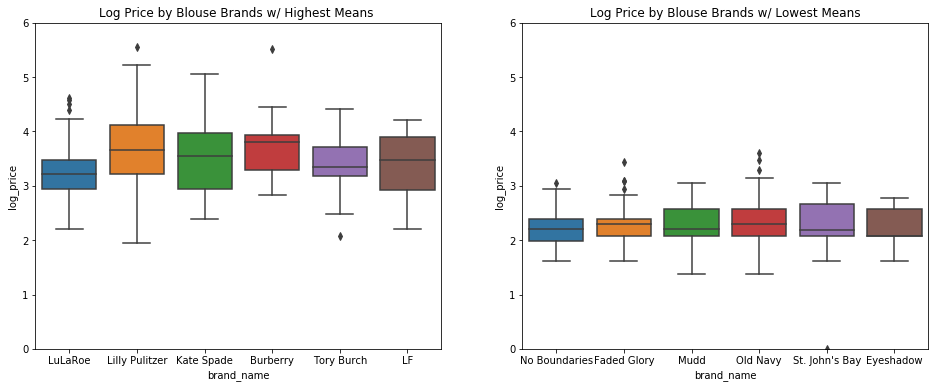

In [30]:
plt.figure(figsize=(16,6))

ax1 = plt.subplot('121')
sns.boxplot(x='brand_name', y='log_price', data=highest, ax=ax1)
ax1.set_ylim(0, 6)
ax1.set_title('Log Price by Blouse Brands w/ Highest Means ')

ax2 = plt.subplot('122')
sns.boxplot(x='brand_name', y='log_price', data=lowest, ax=ax2)
ax2.set_ylim(0, 6)
ax2.set_title('Log Price by Blouse Brands w/ Lowest Means')

plt.show()

We also want to take a look at the price diversity within a brand. We expect a great variety in the items of certain brands, as the items can come from different categories.

In [31]:
train.groupby(by=['brand_name']).agg({"subcat_2": pd.Series.nunique}).\
    sort_values(by='subcat_2', ascending=False).head(5)

,subcat_2
brand_name,
Disney,256
Victoria's Secret,165
Nike,160
Target,160
PINK,147


It doesn't surprise us that Disney has a great variety of products. Lets take a closer look at Disney items and their price distribution.

In [32]:
disney = train[train.brand_name == 'Disney'].copy()
disney['log_price'] = np.log(disney['price']+1) # Take log of prices
disney['all_cat'] = disney['general_cat'] + '/' + disney['subcat_1'] + '/' + disney['subcat_2']

# Keep popular category (#items > 100)
disney_cat = np.unique(disney.all_cat, return_counts=True)
popular_disney_cat = disney_cat[0][disney_cat[1] >= 10]
popular_items = disney[disney.all_cat.isin(popular_disney_cat)]

In [33]:
ordered_cat = popular_items.groupby(by='all_cat')['log_price'].mean().\
    sort_values(ascending=False)
highest_cats = ordered_cat[:6].index.tolist()
lowest_cats = ordered_cat[-6:].index.tolist()

highest = disney[disney.all_cat.isin(highest_cats)]
lowest = disney[disney.all_cat.isin(lowest_cats)]

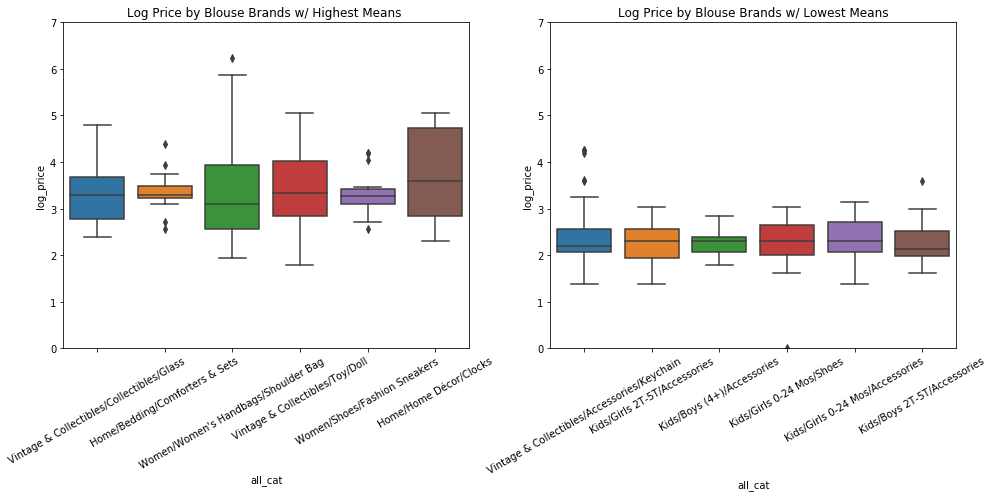

In [34]:
plt.figure(figsize=(16,6))

ax1 = plt.subplot('121')
sns.boxplot(x='all_cat', y='log_price', data=highest)
ax1.set_ylim(0, 7)
plt.xticks(rotation=30) 
ax1.set_title('Log Price by Blouse Brands w/ Highest Means ')

ax2 = plt.subplot('122')
sns.boxplot(x='all_cat', y='log_price', data=lowest)
ax2.set_ylim(0, 7)
plt.xticks(rotation=30) 
ax2.set_title('Log Price by Blouse Brands w/ Lowest Means')

plt.show()

In [35]:
x = train['brand_name'].value_counts().index.values.astype('str')
y = train['brand_name'].value_counts().values

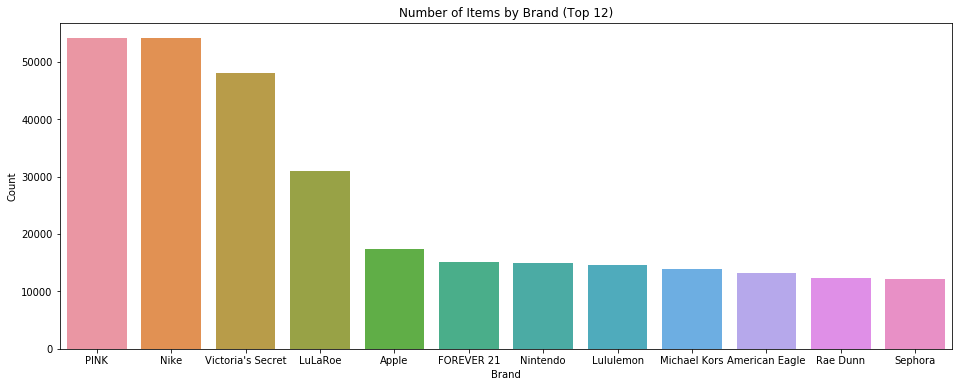

In [36]:
plt.figure(figsize=(16,6))
sns.barplot(x[:12], y[:12])
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of Items by Brand (Top 12)')
plt.show()

Many of the top sellers are from Women and Electronics category. The brands will be a useful feature of determining price level in each category. Lateron, we can include brands in a random forest model.

### Item Description
It is challenging to parse through item description it's unstructured data written by customers. A more detailed and lengthy description does not necessarily indicate a higher bidding price. We will strip out all punctuations, remove stop words and any words less than 3 alphabets.

In [37]:
print("There are %d missing values item description." % train.item_description.isnull().sum())

# remove missing values in item description
train = train[pd.notnull(train['item_description'])]

There are 4 missing values item description.


In [38]:
def wordCount(text):
    # convert to lower case and strip regex
    try:
         # convert to lower case and strip regex
        text = text.lower()
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        txt = regex.sub(" ", text)
        # tokenize
        # words = nltk.word_tokenize(clean_txt)
        # remove words in stop words
        words = [w for w in txt.split(" ") if not w in stop_words.ENGLISH_STOP_WORDS and len(w)>3]
        return len(words)
    except: 
        return 0

In [39]:
# add a column of word counts to both the training and test set
train['desc_len'] = train['item_description'].apply(lambda x: wordCount(x))
test['desc_len'] = test['item_description'].apply(lambda x: wordCount(x))

In [40]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2,desc_len
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,1
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,14
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,8
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,14
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,3


In [41]:
df = train.groupby('desc_len')['price'].mean().reset_index()

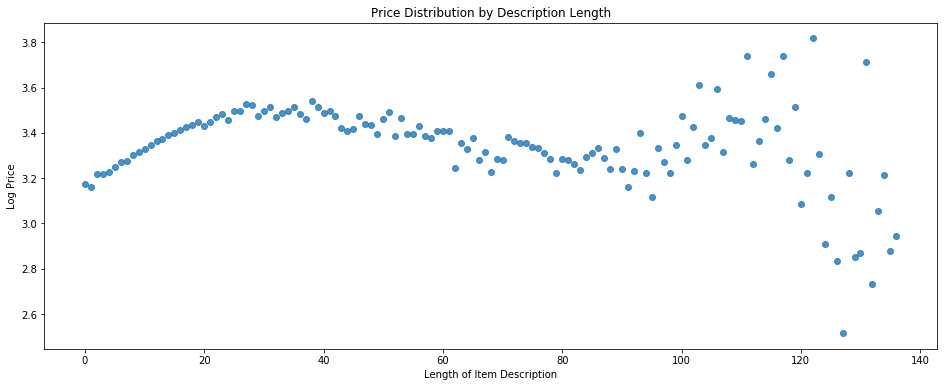

In [56]:
plt.figure(figsize=(16,6))
sns.regplot(x=df.desc_len, y=np.log(df.price+1), fit_reg=False)
plt.xlabel('Length of Item Description')
plt.ylabel('Log Price')
plt.title('Price Distribution by Description Length')
plt.show()

In [43]:
df2=train[train.desc_len <= 20]

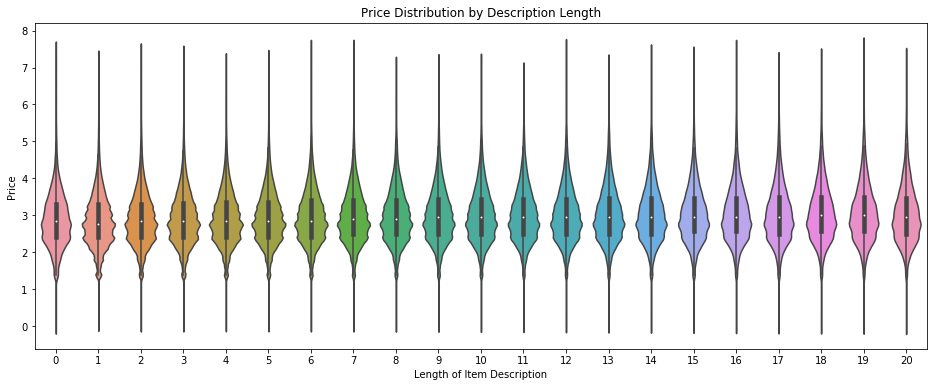

In [58]:
plt.figure(figsize=(16,6))
sns.violinplot(x=df2.desc_len, y=np.log(df2.price+1))
plt.xlabel('Length of Item Description')
plt.ylabel('Price')
plt.title('Price Distribution by Description Length')
plt.show()

Text Processing - Item Description